In [1]:
import pandas as pd
import numpy as np

In [2]:
#df = pd.read_csv("D:\programs\Machine Learning\digit recogniser\drive-download-20211130T065619Z-001/train.csv")
url='https://drive.google.com/file/d/1ypMLqEnq8znpl8fDvSYLZEmZClSWQsi2/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
print(df.shape) #28*28=784

(42000, 785)


In [4]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=df.values

In [7]:
print(data.shape)

(42000, 785)


In [8]:
print(type(data))

<class 'numpy.ndarray'>


In [9]:
x= data[:,1:]
y=data[:,0]

In [10]:
print(x.shape,y.shape)

(42000, 784) (42000,)


In [11]:
%matplotlib inline

In [12]:
import matplotlib
import matplotlib.pyplot as plt

In [13]:
num=300
Digit=x[num]
img_digit=Digit.reshape(28,28)  #mnist img_size= 28X28

(-0.5, 27.5, 27.5, -0.5)

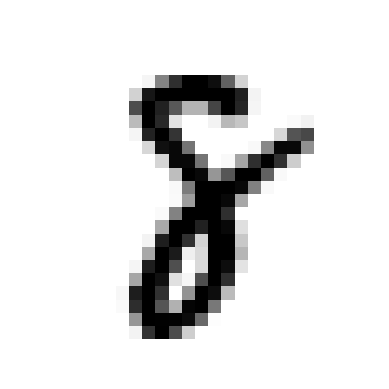

In [14]:
plt.imshow(img_digit,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [15]:
y[num]

8

In [16]:
# train test split 
split=int(0.5*x.shape[0])
split

21000

In [17]:
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[:split]

In [18]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(21000, 784) (21000, 784)
(21000,) (21000,)


In [19]:
#Y train 2  and test 2 store 'True' and 'False' (check whether y_train is 9 or not )
y_train_2=(y_train==9)
y_test_2=(y_test==9)

In [20]:
print(y_train_2)
print(y_test_2)

[False False False ... False  True False]
[False False False ... False  True False]


In [21]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [22]:
lg.fit(x_train,y_train_2)

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
lg.predict([Digit])

array([False])

In [24]:
from sklearn.model_selection import cross_val_score
z=cross_val_score(lg,x_train,y_train_2,cv=3,scoring='accuracy')

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [26]:
Accuracy=z.mean()*100
Accuracy

95.53333333333333